# Nonlinear Benchmark Workshop Datasets

> Fill in a module description here

In [ ]:
#| default_exp datasets.workshop

In [ ]:
#| export
from identibench.utils import *
import identibench.benchmark as idb
import identibench.metrics
import nonlinear_benchmarks
import numpy as np
from nonlinear_benchmarks.utilities import Input_output_data
from pathlib import Path
import shutil

In [ ]:
#| hide
import matplotlib.pyplot as plt

In [ ]:
tmp_dir = idb.get_default_data_root()

## Wiener Hammerstein Dataset

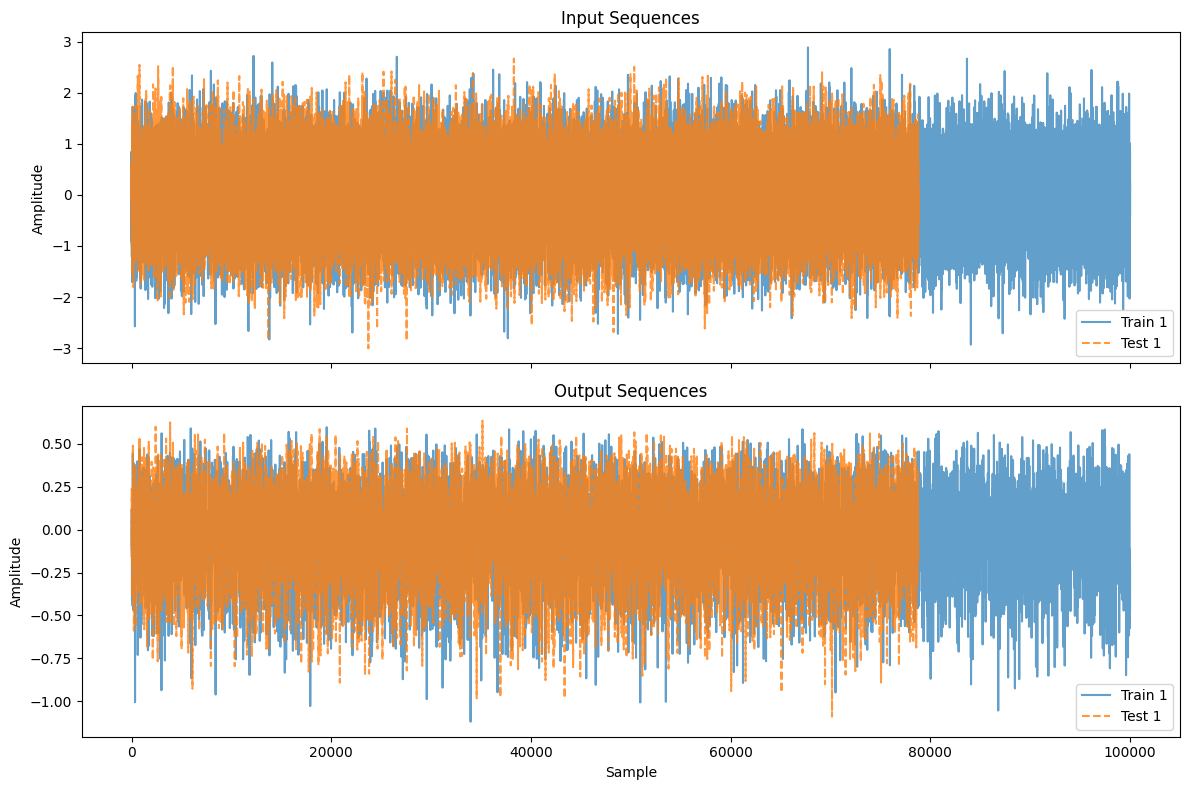

In [ ]:
def plot_workshop_data(dataset_function,max_sequences=3):
    train_val, test = dataset_function(always_return_tuples_of_datasets=True)
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    # Plot training/validation data
    for i, data in enumerate(train_val[:max_sequences]):
        axs[0].plot(data.u, alpha=0.7, label=f'Train {i+1}')
        axs[1].plot(data.y, alpha=0.7, label=f'Train {i+1}')

    # Plot test data
    for i, data in enumerate(test[:max_sequences]):
        axs[0].plot(data.u, ls='--', alpha=0.8, label=f'Test {i+1}')
        axs[1].plot(data.y, ls='--', alpha=0.8, label=f'Test {i+1}')

    axs[0].set_title('Input Sequences')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()

    axs[1].set_title('Output Sequences')
    axs[1].set_xlabel('Sample')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()

    plt.tight_layout()
plot_workshop_data(nonlinear_benchmarks.WienerHammerBenchMark)

In [ ]:
#| export
def wiener_hammerstein(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 80_000 # split index for train and valid datasets
) -> None:
    train_val, test = nonlinear_benchmarks.WienerHammerBenchMark(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
wiener_hammerstein(tmp_dir / 'wh' )
wiener_hammerstein(tmp_dir / 'wh' ,save_train_valid=False)

In [ ]:
#| exporti
def rmse_mV(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return identibench.metrics.rmse(y_true,y_pred)*1000

In [ ]:
#| export
BenchmarkWH_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkWH_Simulation', dataset_id='wh',
    u_cols=['u0'], y_cols=['y0'], 
    metric_func=rmse_mV, 
    download_func=wiener_hammerstein,
    init_window=50
)
BenchmarkWH_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkWH_Prediction', dataset_id='wh',
    u_cols=['u0'], y_cols=['y0'], 
    metric_func=rmse_mV, 
    download_func=wiener_hammerstein,
    init_window=50, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkWH_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkWH_Simulation, seed: 3240984938


{'benchmark_name': 'BenchmarkWH_Simulation',
 'dataset_id': 'wh',
 'hyperparameters': {},
 'seed': 3240984938,
 'training_time_seconds': 0.00014316700980998576,
 'test_time_seconds': 0.0009329169988632202,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_name': 'rmse_mV',
 'metric_score': 247.20421449579186,
 'custom_scores': {},
 'model_predictions': [(array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   array([[ 0.0690117 ],
          [ 0.0837754 ],
          [ 0.10025581],
          ...,
          [-0.094419  ],
          [-0.08068532],
          [-0.07038508]], dtype=float32))]}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkWH_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkWH_Prediction, seed: 3805496723


{'benchmark_name': 'BenchmarkWH_Prediction',
 'dataset_id': 'wh',
 'hyperparameters': {},
 'seed': 3805496723,
 'training_time_seconds': 1.8375023500993848e-05,
 'test_time_seconds': 0.0015908329805824906,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_name': 'rmse_mV',
 'metric_score': 232.67166432004274,
 'custom_scores': {},
 'model_predictions': [[(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [

## Silverbox Dataset

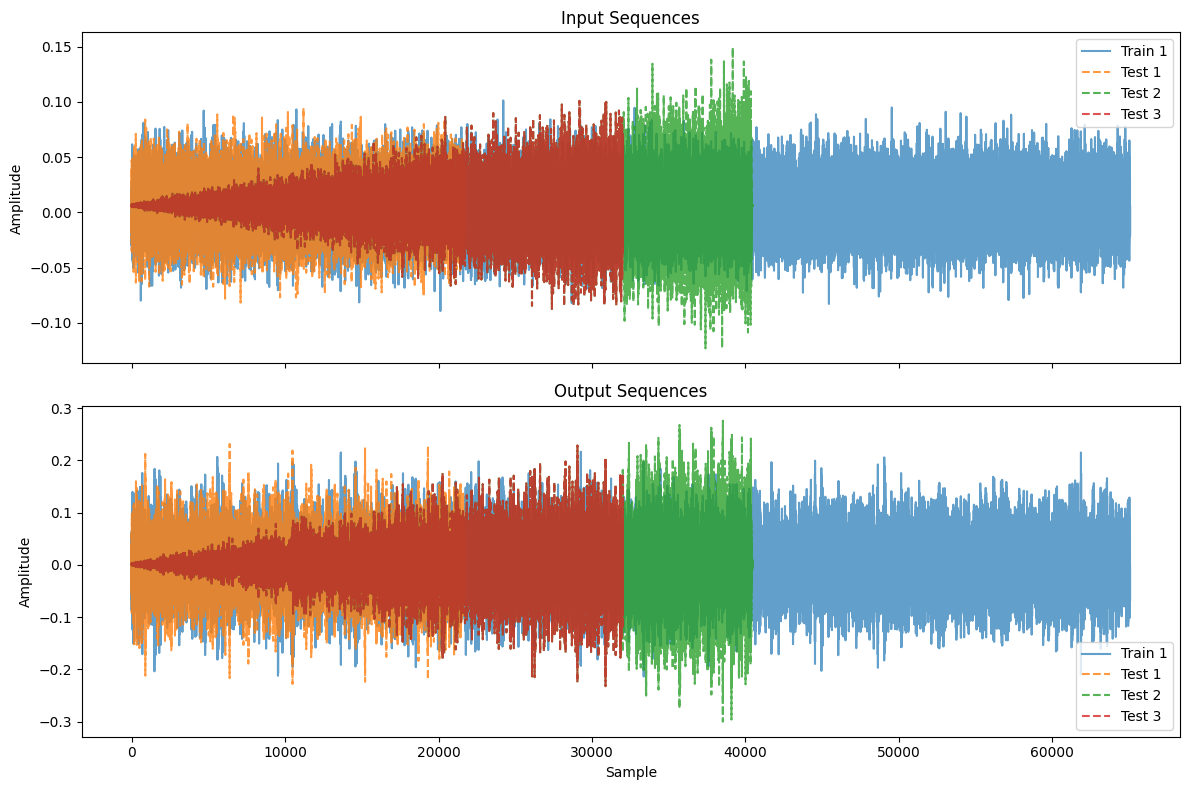

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Silverbox)

In [ ]:
#| export
def silverbox(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 50_000 # split index for train and valid datasets
) -> None:
    train_val, test = nonlinear_benchmarks.Silverbox(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
silverbox(tmp_dir / 'silverbox')

In [ ]:
#| exporti
def evaluate_silverbox(results: list[tuple[np.ndarray, np.ndarray]], spec: idb.BenchmarkSpecBase) -> dict[str, float]:

    test_configs = [
        ('test_0.hdf5', 'multisine_rmse'),
        ('test_1.hdf5', 'arrow_full_rmse'),
        ('test_2.hdf5', 'arrow_no_extrapolation_rmse'),
    ]

    aggregated_scores = {}
    for filename_part, score_name in test_configs:
        # Find the index for the current filename part
        idx = next(i for i, s in enumerate(spec.test_files) if filename_part in s.name) 
        aggregated_scores.update(
            idb.aggregate_metric_score([results[idx]], spec.metric_func, score_name=score_name)
        )

    return aggregated_scores

In [ ]:
#| export
BenchmarkSilverbox_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkSilverbox_Simulation', dataset_id='silverbox',
    u_cols=['u0'], y_cols=['y0'], 
    metric_func=rmse_mV, 
    download_func=silverbox,
    custom_test_evaluation=evaluate_silverbox,
    init_window=50
)
BenchmarkSilverbox_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkSilverbox_Prediction', dataset_id='silverbox',
    u_cols=['u0'], y_cols=['y0'], 
    metric_func=rmse_mV, 
    download_func=silverbox,
    custom_test_evaluation=evaluate_silverbox,
    init_window=50, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkSilverbox_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkSilverbox_Simulation, seed: 3811293837


{'benchmark_name': 'BenchmarkSilverbox_Simulation',
 'dataset_id': 'silverbox',
 'hyperparameters': {},
 'seed': 3811293837,
 'training_time_seconds': 0.0006382919964380562,
 'test_time_seconds': 0.0029457919881679118,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_name': 'rmse_mV',
 'metric_score': 50.27112906124001,
 'custom_scores': {'multisine_rmse': 54.309251281090646,
  'arrow_full_rmse': 53.48728676241358,
  'arrow_no_extrapolation_rmse': 43.01684914021582},
 'model_predictions': [(array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   array([[-0.0821678 ],
          [-0.03213157],
          [ 0.01816539],
          ...,
          [ 0.06572893],
          [ 0.07365291],
          [ 0.04153714]], dtype=float32)),
  (array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   array([[-0.00136566],
          [-0.00049813],
          [ 0.00109041],
          ...,
  

In [ ]:
idb.run_benchmark(
    spec=BenchmarkSilverbox_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkSilverbox_Prediction, seed: 3494547266


{'benchmark_name': 'BenchmarkSilverbox_Prediction',
 'dataset_id': 'silverbox',
 'hyperparameters': {},
 'seed': 3494547266,
 'training_time_seconds': 0.00026658299611881375,
 'test_time_seconds': 0.004111624992219731,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_name': 'rmse_mV',
 'metric_score': 44.66175583674749,
 'custom_scores': {'multisine_rmse': 52.06252571132554,
  'arrow_full_rmse': 45.43615160782839,
  'arrow_no_extrapolation_rmse': 36.48659019108853},
 'model_predictions': [[(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
         

## Cascaded Tanks Dataset

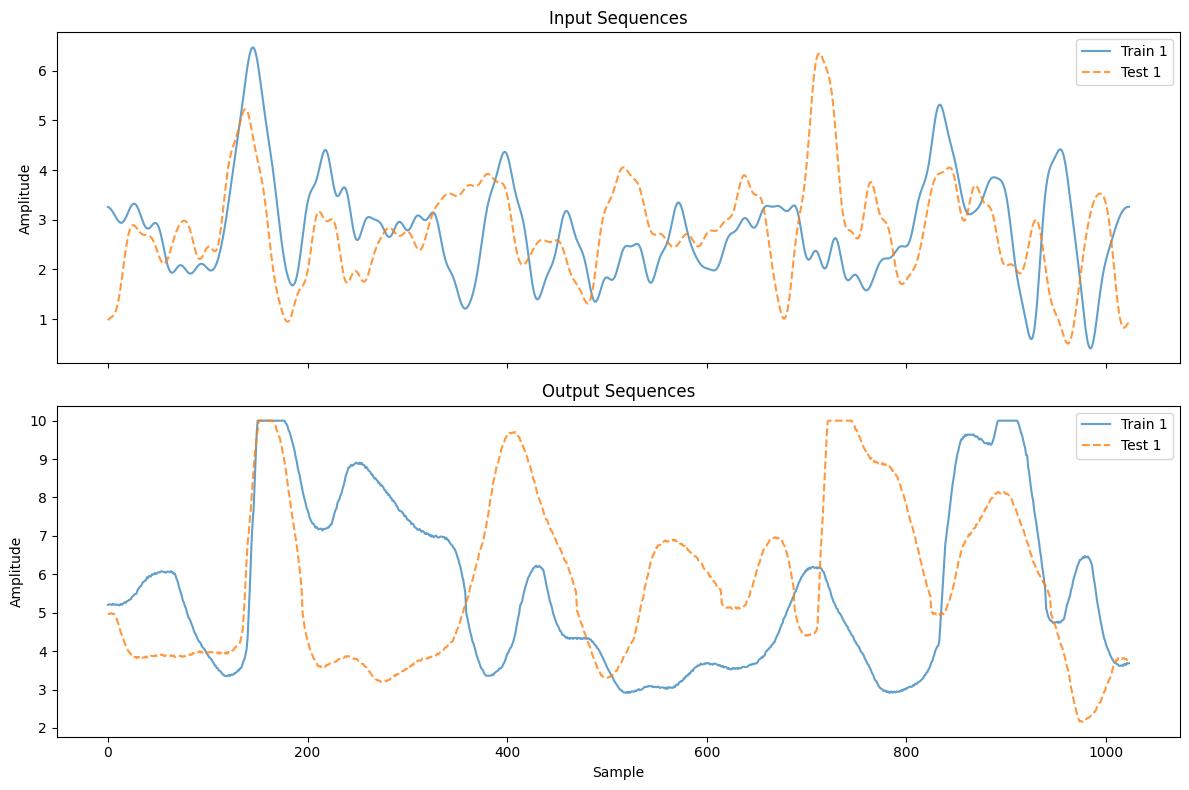

In [ ]:
plot_workshop_data(nonlinear_benchmarks.Cascaded_Tanks) 

In [ ]:
#| export
def cascaded_tanks(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 160 # split index for train and valid datasets
) -> None:
    train_val, test = nonlinear_benchmarks.Cascaded_Tanks(force_download=force_download)
    train = train_val[split_idx:]
    valid = train_val[:split_idx]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
cascaded_tanks(tmp_dir  / 'cascaded_tanks' )

In [ ]:
#| export
BenchmarkCascadedTanks_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkCascadedTanks_Simulation', dataset_id='cascaded_tanks',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=cascaded_tanks,
    init_window=50
)
BenchmarkCascadedTanks_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkCascadedTanks_Prediction', dataset_id='cascaded_tanks',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=cascaded_tanks,
    init_window=50, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCascadedTanks_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCascadedTanks_Simulation, seed: 2309692928


{'benchmark_name': 'BenchmarkCascadedTanks_Simulation',
 'dataset_id': 'cascaded_tanks',
 'hyperparameters': {},
 'seed': 2309692928,
 'training_time_seconds': 0.00022929100668989122,
 'test_time_seconds': 0.0006932499818503857,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_name': 'rmse',
 'metric_score': 6.190198457201898,
 'custom_scores': {},
 'model_predictions': [(array([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.]

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCascadedTanks_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCascadedTanks_Prediction, seed: 1457937301


{'benchmark_name': 'BenchmarkCascadedTanks_Prediction',
 'dataset_id': 'cascaded_tanks',
 'hyperparameters': {},
 'seed': 1457937301,
 'training_time_seconds': 1.591601176187396e-05,
 'test_time_seconds': 0.0009151250123977661,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_name': 'rmse',
 'metric_score': 5.7097724152265386,
 'custom_scores': {},
 'model_predictions': [[(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
          

## EMPS Dataset

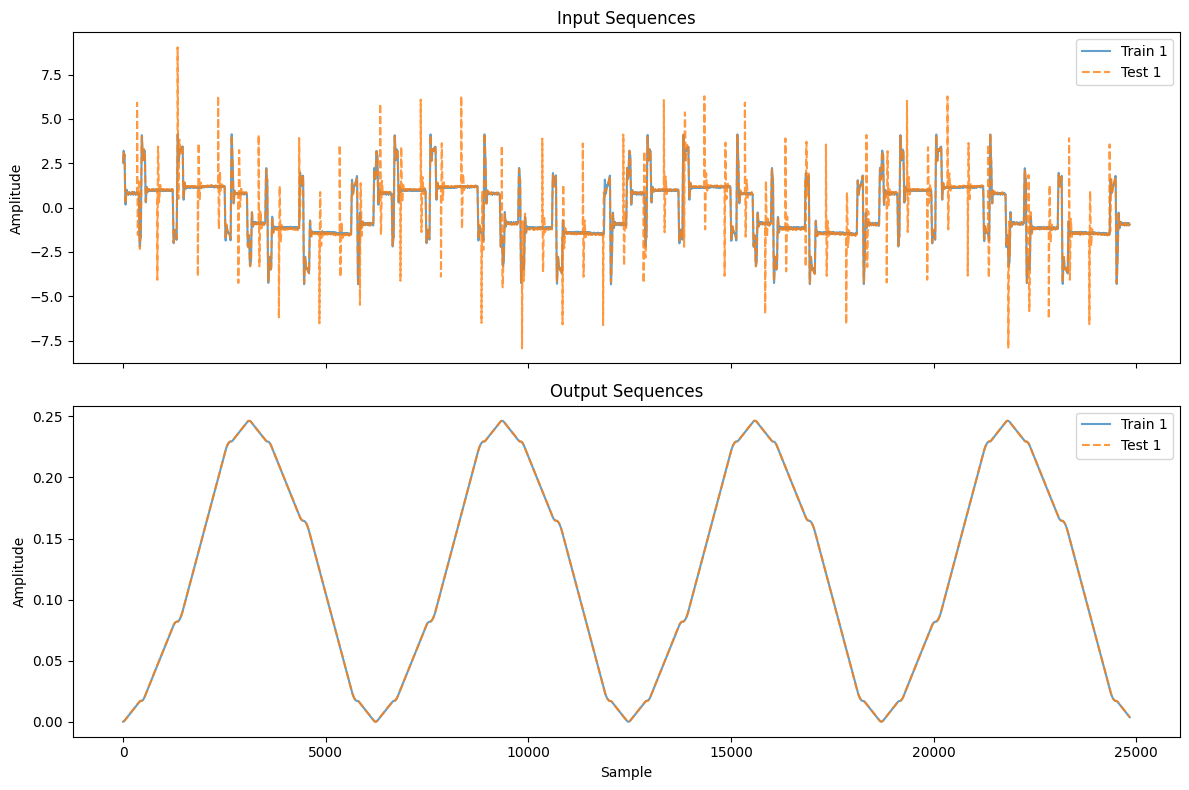

In [ ]:
plot_workshop_data(nonlinear_benchmarks.EMPS)

In [ ]:
#| export
def emps(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 18_000 # split index for train and valid datasets
) -> None:
    train_val, test = nonlinear_benchmarks.EMPS(force_download=force_download)
    train = train_val[:split_idx]
    valid = train_val[split_idx:]

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
emps(tmp_dir  / 'emps')

In [ ]:
#| export
BenchmarkEMPS_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkEMPS_Simulation', dataset_id='emps',
    u_cols=['u0'], y_cols=['y0'], metric_func=rmse_mV, 
    download_func=emps,
    init_window=20
)
BenchmarkEMPS_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkEMPS_Prediction', dataset_id='emps',
    u_cols=['u0'], y_cols=['y0'], metric_func=rmse_mV, 
    download_func=emps,
    init_window=20, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkEMPS_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkEMPS_Simulation, seed: 3772927320


{'benchmark_name': 'BenchmarkEMPS_Simulation',
 'dataset_id': 'emps',
 'hyperparameters': {},
 'seed': 3772927320,
 'training_time_seconds': 4.6958011807873845e-05,
 'test_time_seconds': 0.001134707999881357,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_name': 'rmse_mV',
 'metric_score': 148.94509370511423,
 'custom_scores': {},
 'model_predictions': [(array([[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]),
   array([[0.00031681],
          [0.00034222],
          [0.00036856],
          ...,
          [0.00382807],
          [0.00378583],
          [0.0037439 ]], dtype=float32))]}

In [ ]:
idb.run_benchmark(
    spec=BenchmarkEMPS_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkEMPS_Prediction, seed: 1495306708


{'benchmark_name': 'BenchmarkEMPS_Prediction',
 'dataset_id': 'emps',
 'hyperparameters': {},
 'seed': 1495306708,
 'training_time_seconds': 1.8624996300786734e-05,
 'test_time_seconds': 0.0009503330220468342,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_name': 'rmse_mV',
 'metric_score': 123.54283828275112,
 'custom_scores': {},
 'model_predictions': [[(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.]]),
    array([[7.6702163e-06],
           [1.4544548e-05],
           [2.1983300e-05],
           [3.0309158e-05],
           [3.9594859e-05],
           [4.9795202e-05],
           [6.0886334e-05],
           [7.2893810e-05],
           [8.5849482e-05],
           [9.9766126e-05],
           [1.1

## Noisy Wiener Hammerstein

In [ ]:
#| export
from scipy.io import loadmat
def noisy_wh(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True # save unsplitted train and valid datasets in 'train_valid' subdirectory
) -> None:
    'the wiener hammerstein dataset with process noise'

    #extract raw .mat files, to preserve filenames necessary for train, valid split
    matfiles = nonlinear_benchmarks.not_splitted_benchmarks.WienerHammerstein_Process_Noise(data_file_locations=True,train_test_split=False,force_download=force_download)

    for file in matfiles:
        f_path = Path(file)
        save_path = Path(save_path)

        if 'Test' in f_path.stem:
            hdf_path = save_path / 'test'
        elif 'Combined' in f_path.stem:
            hdf_path = save_path / 'valid'
        else:
            hdf_path = save_path / 'train'

        out = loadmat(f_path)
        _,u,y,fs = out['dataMeas'][0,0]
        fs = fs[0,0]
        for idx,(ui,yi) in enumerate(zip(u.T,y.T)):
            iodata = Input_output_data(u=ui,y=yi, sampling_time=1/fs)
            fname = f'{f_path.stem}_{idx+1}'
            iodata_to_hdf5(iodata,hdf_path,fname)
    if save_train_valid:
        #copy train and valid files to train_valid directory
        for d in ['train','valid']:
            for f in (Path(save_path)/d).glob('*.hdf5') :
                shutil.copy2(f, (p:=Path(save_path)/'train_valid').mkdir(exist_ok=True) or p)


In [ ]:
noisy_wh(tmp_dir / 'noisy_wh' )

In [ ]:
#| export
BenchmarkNoisyWH_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkNoisyWH_Simulation', dataset_id='noisy_wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=rmse_mV, 
    download_func=noisy_wh,
    init_window=100
)
BenchmarkNoisyWH_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkNoisyWH_Prediction', dataset_id='noisy_wh',
    u_cols=['u0'], y_cols=['y0'], metric_func=rmse_mV, 
    download_func=noisy_wh,
    init_window=100, pred_horizon=100, pred_step=100
)

In [ ]:
results = idb.run_benchmark(
    spec=BenchmarkNoisyWH_Simulation, 
    build_model=idb._dummy_build_model
)
results['metric_score']

Building model with spec: BenchmarkNoisyWH_Simulation, seed: 1264269019


104.1542183129001

In [ ]:
results = idb.run_benchmark(
    spec=BenchmarkNoisyWH_Prediction, 
    build_model=idb._dummy_build_model
)
results['metric_score']

Building model with spec: BenchmarkNoisyWH_Prediction, seed: 2506300688


80.45737172002092

## Parallel Wienerhammerstein

In [ ]:
#ToDo

## F16

In [ ]:
#ToDo

## Coupled Electric Drives

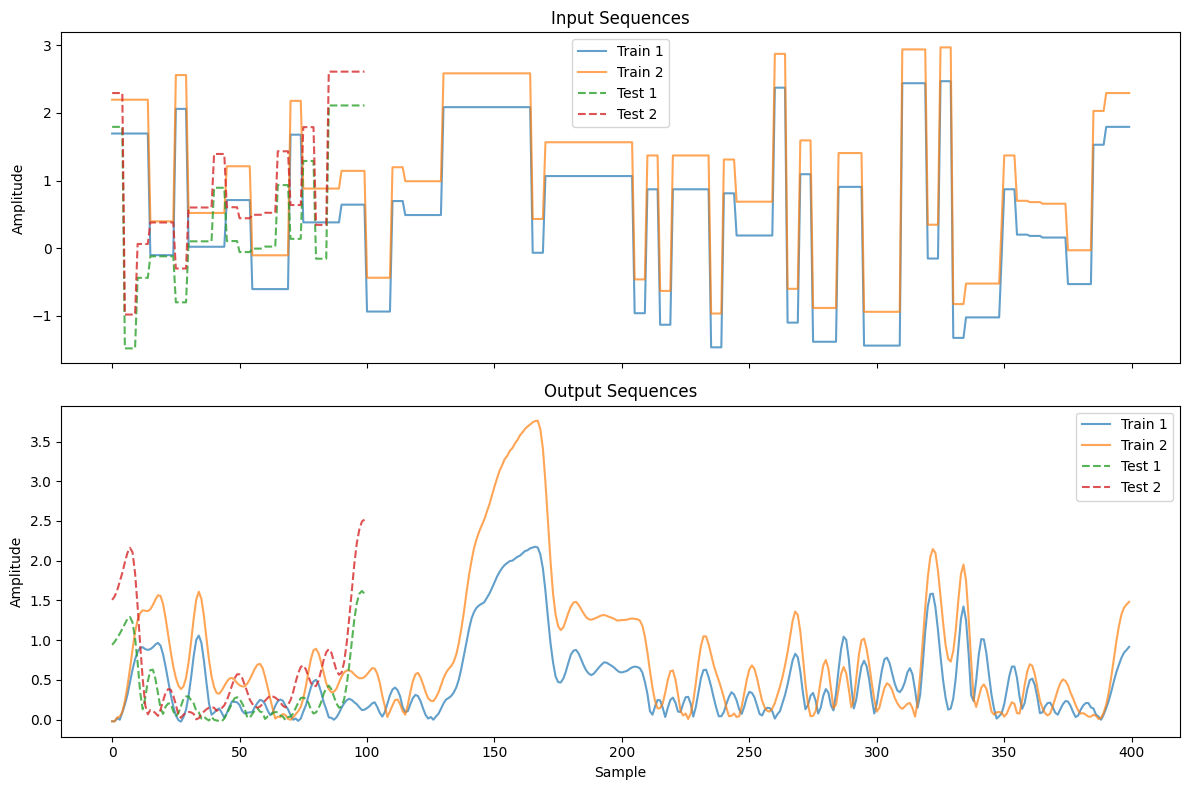

In [ ]:
plot_workshop_data(nonlinear_benchmarks.CED)

In [ ]:
#| export
def ced(
        save_path: Path, #directory the files are written to, created if it does not exist
        force_download: bool = False, # force download the dataset
        save_train_valid: bool = True, # save unsplitted train and valid datasets in 'train_valid' subdirectory
        split_idx: int = 300 # split index for train and valid datasets
) -> None:
    train_val, test = nonlinear_benchmarks.CED(force_download=force_download,always_return_tuples_of_datasets=True)
    train = tuple(x[:split_idx] for x in train_val)
    valid = tuple(x[split_idx:] for x in train_val)

    dataset_to_hdf5(train,valid,test,save_path,train_valid=(train_val if save_train_valid else None))

In [ ]:
ced(tmp_dir / 'ced' )

In [ ]:
#| exporti
def evaluate_ced(results: list[tuple[np.ndarray, np.ndarray]], spec: idb.BenchmarkSpecBase) -> dict[str, float]:
    test_configs = [
        ('test_0.hdf5', 'test_1_rmse'),
        ('test_1.hdf5', 'test_2_rmse'),
    ]

    aggregated_scores = {}
    for filename_part, score_name in test_configs:
        # Find the index for the current filename part
        idx = next(i for i, s in enumerate(spec.test_files) if filename_part in s.name) 
        aggregated_scores.update(
            idb.aggregate_metric_score([results[idx]], spec.metric_func, score_name=score_name)
        )

    return aggregated_scores

In [ ]:
#| export
BenchmarkCED_Simulation = idb.BenchmarkSpecSimulation(
    name='BenchmarkCED_Simulation', dataset_id='ced',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=ced,
    custom_test_evaluation=evaluate_ced,
    init_window=10
)
BenchmarkCED_Prediction = idb.BenchmarkSpecPrediction(
    name='BenchmarkCED_Prediction', dataset_id='ced',
    u_cols=['u0'], y_cols=['y0'], metric_func=identibench.metrics.rmse, 
    download_func=ced,
    custom_test_evaluation=evaluate_ced,
    init_window=10, pred_horizon=100, pred_step=100
)

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCED_Simulation, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCED_Simulation, seed: 203830842


{'benchmark_name': 'BenchmarkCED_Simulation',
 'dataset_id': 'ced',
 'hyperparameters': {},
 'seed': 203830842,
 'training_time_seconds': 0.00016929098637774587,
 'test_time_seconds': 0.0009969169914256781,
 'benchmark_type': 'BenchmarkSpecSimulation',
 'metric_name': 'rmse',
 'metric_score': 0.5816430221160263,
 'custom_scores': {'test_1_rmse': 0.4385827112493006,
  'test_2_rmse': 0.7247033329827519},
 'model_predictions': [(array([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.

In [ ]:
idb.run_benchmark(
    spec=BenchmarkCED_Prediction, 
    build_model=idb._dummy_build_model
)

Building model with spec: BenchmarkCED_Prediction, seed: 1273445936


{'benchmark_name': 'BenchmarkCED_Prediction',
 'dataset_id': 'ced',
 'hyperparameters': {},
 'seed': 1273445936,
 'training_time_seconds': 1.795799471437931e-05,
 'test_time_seconds': 0.000824916991405189,
 'benchmark_type': 'BenchmarkSpecPrediction',
 'metric_name': 'rmse',
 'metric_score': 1.4920805359098914,
 'custom_scores': {'test_1_rmse': 1.1242280555930262,
  'test_2_rmse': 1.8599330162267567},
 'model_predictions': [[(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.]]),
    array([[0.94017094],
           [0.979243  ],
           [1.0280831 ],
           [1.0818071 ],
           [1.1404152 ],
           [1.2039073 ],
           [1.2673993 ],
           [1.2918193 ],
           [1.2234433 ],
           [1.0231991 ]], dtype=float32))],
  [(array([[0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.],
           [0.

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()